In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport
import sweetviz as sv

In [12]:
DIR = '../dataset'
# DATASET = 'acs_5yr_est_selected_economic_characteristics_2010-2022.csv'
# DATASET = 'all_commodities.csv'
DATASET = 'all_stock_and_etfs.csv'
# DATASET = 'Meat_Stats_Cold_Storage.csv'
# DATASET = 'Meat_Stats_Meat_Production.csv'
# DATASET = 'Meat_Stats_Slaughter_Counts.csv'
# DATASET = 'Meat_Stats_Slaughter_Weights.csv'
# DATASET = 'Nutrition_Physical_Activity_and_Obesity_Data.csv'
# DATASET = 'stock_descriptions.csv'

df = pd.read_csv(os.path.join(DIR, DATASET))

In [13]:
ProfileReport(df, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |          | [  0%]   00:00 -> (? left)


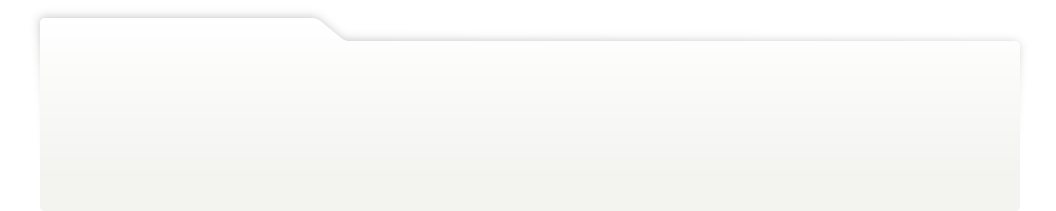
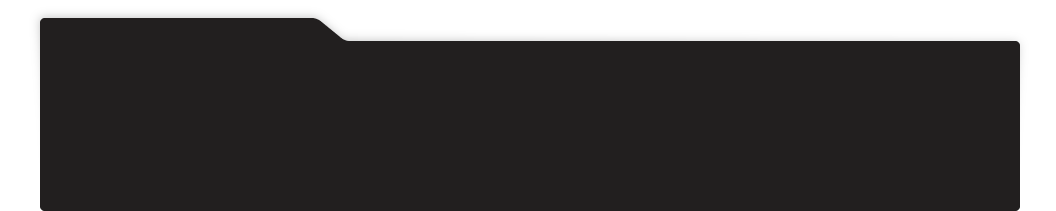
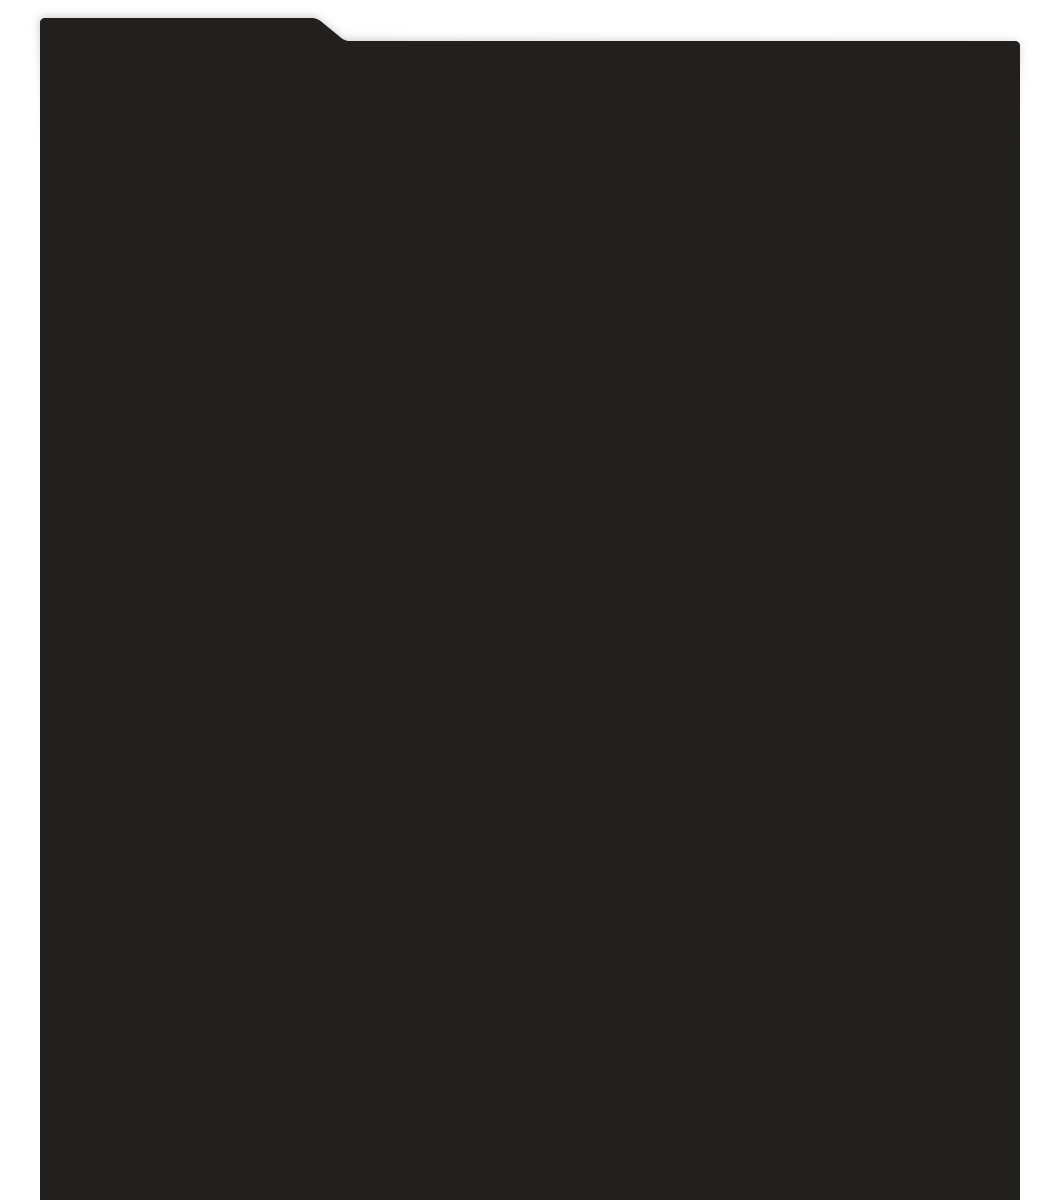
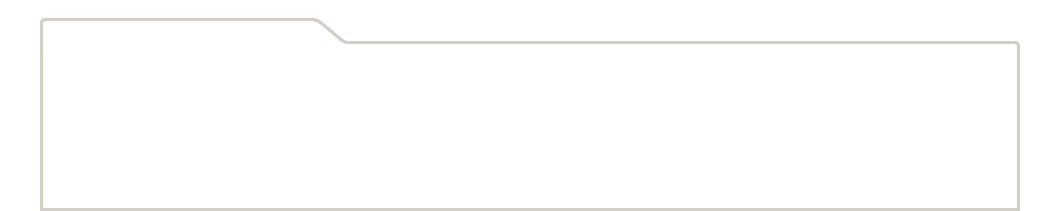
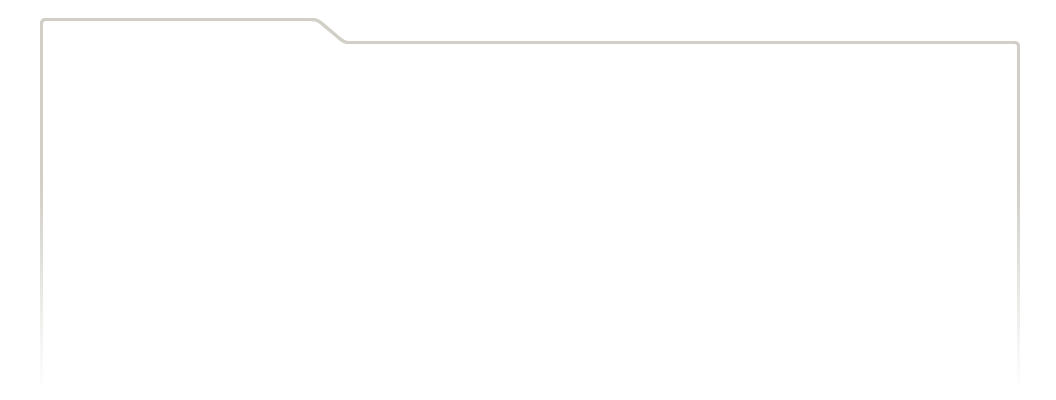
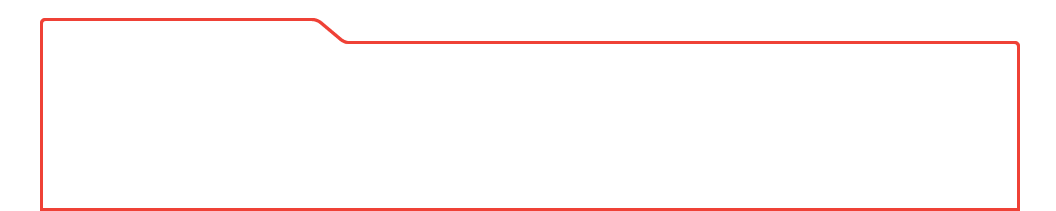
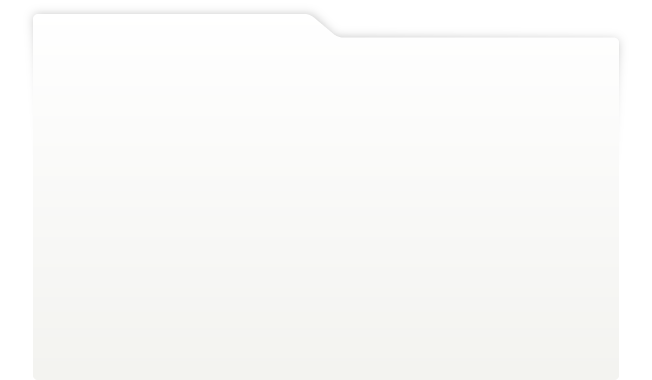
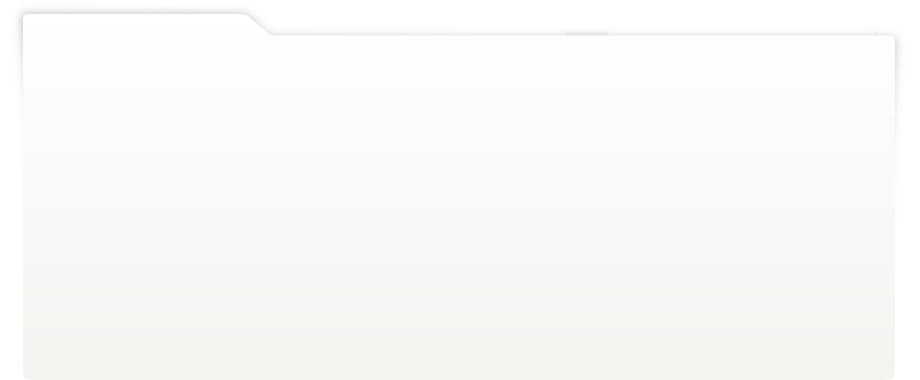
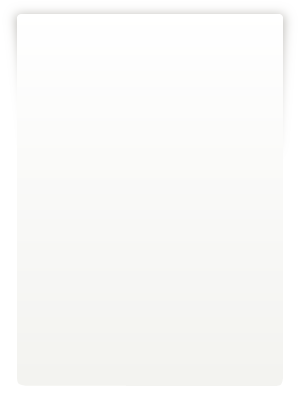
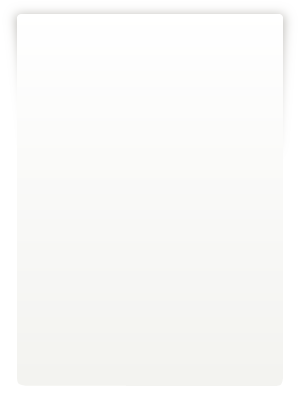
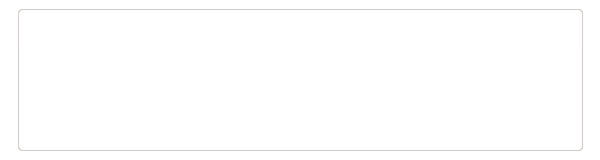
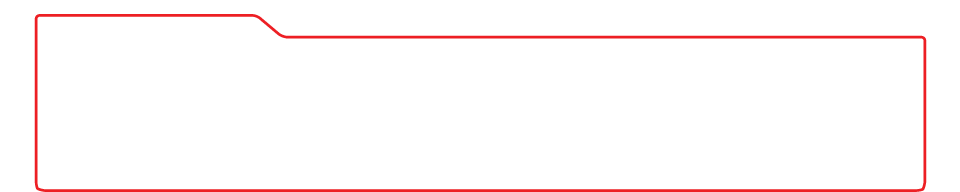
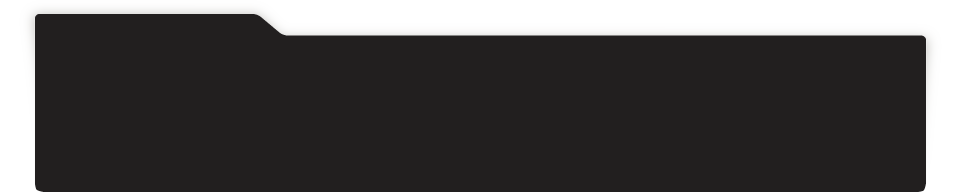
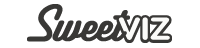
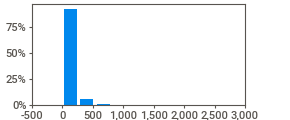
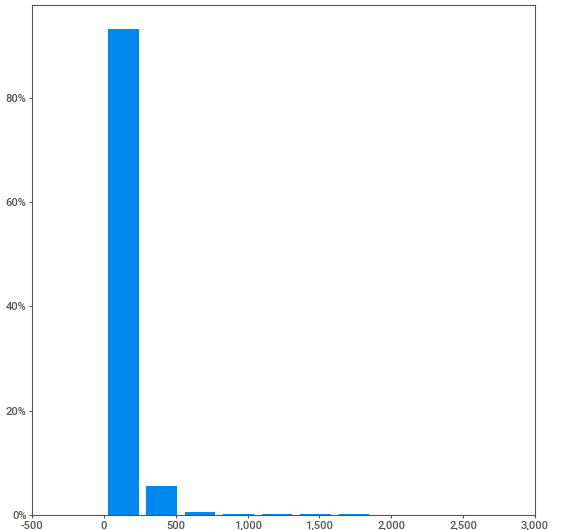
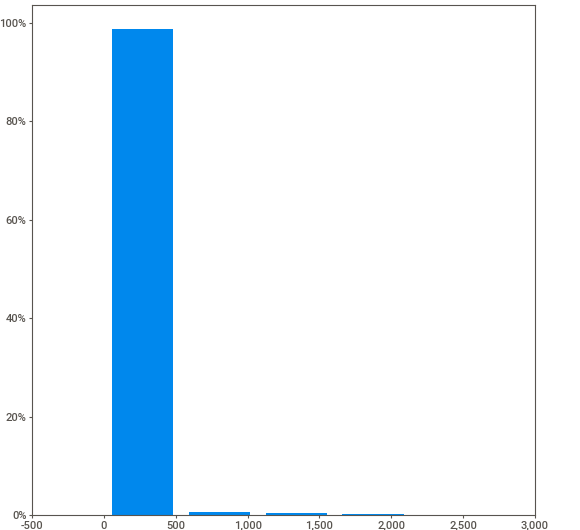
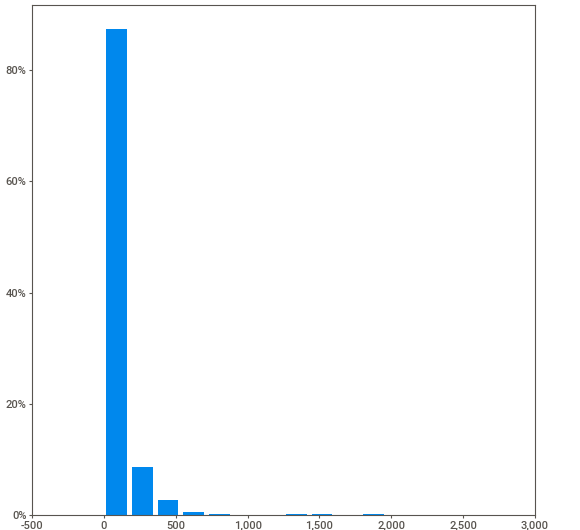
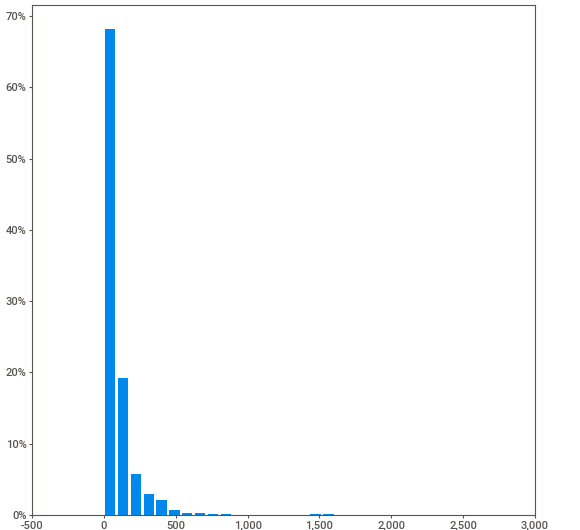
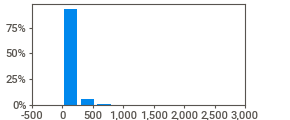
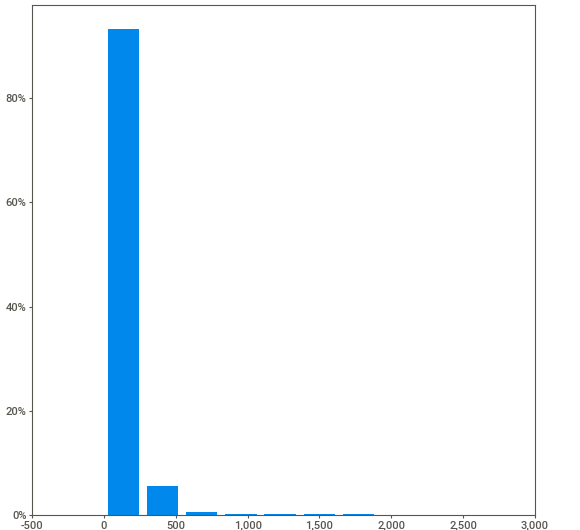
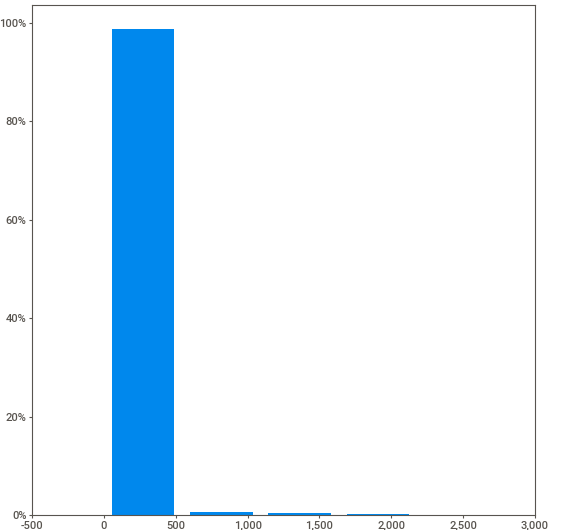
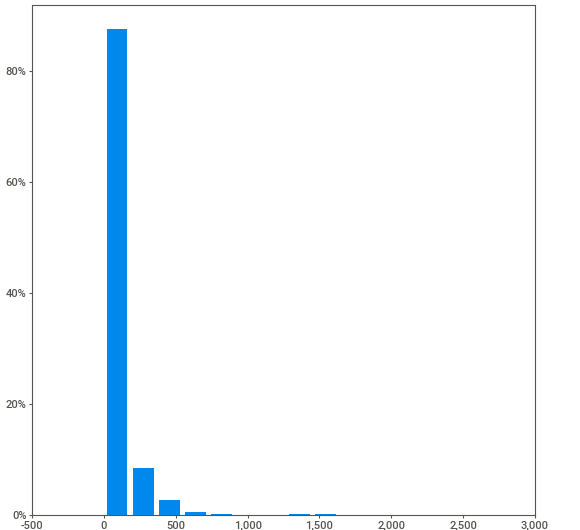
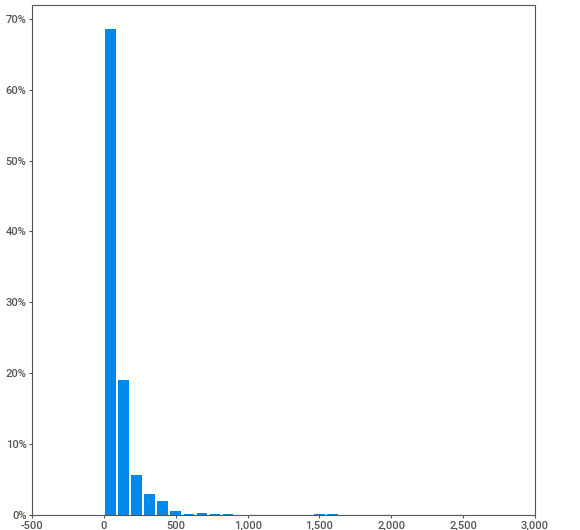
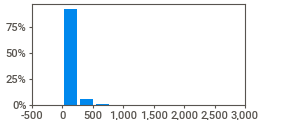
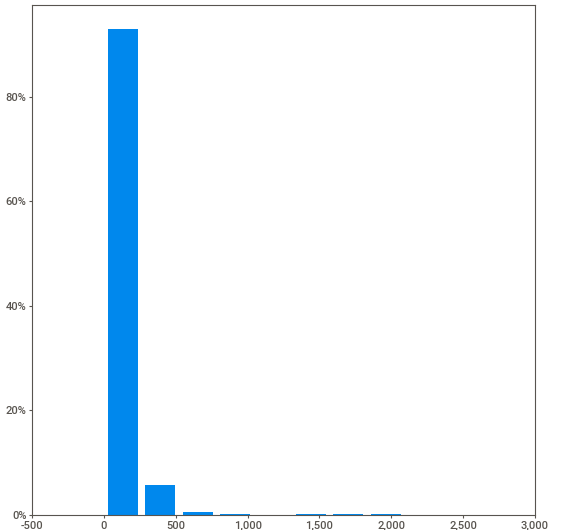
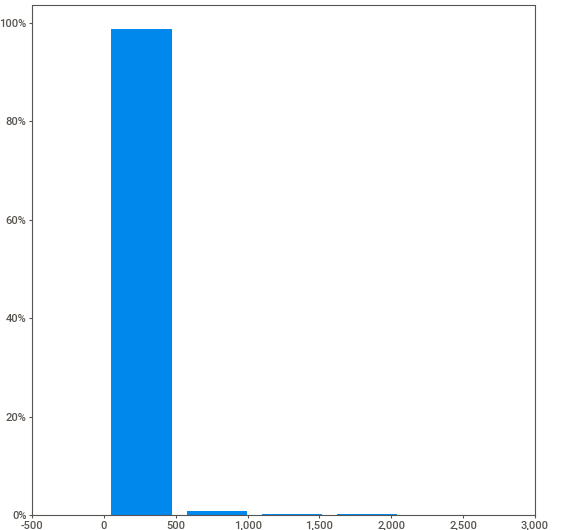
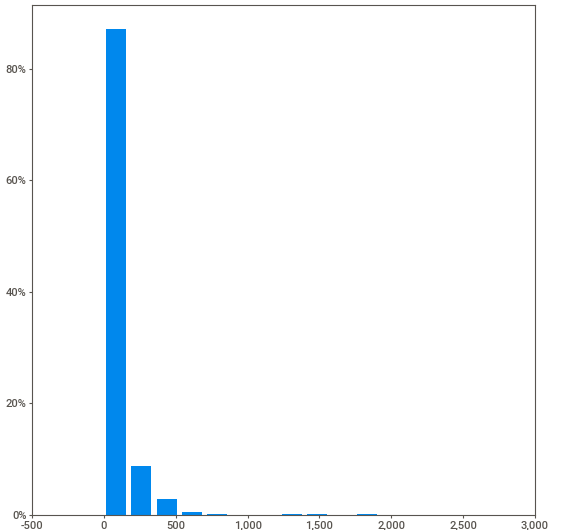
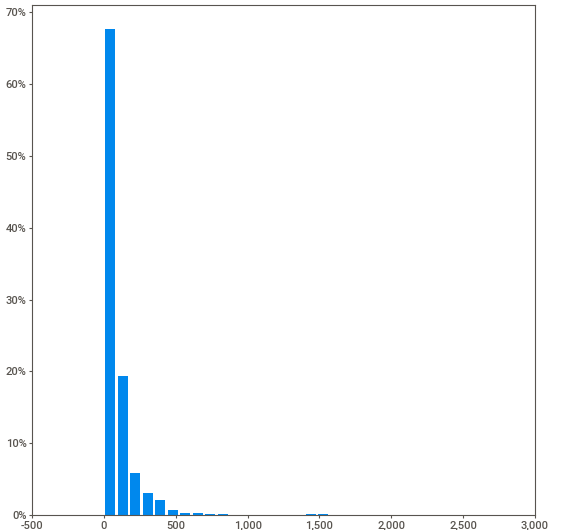
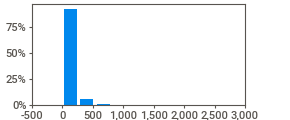
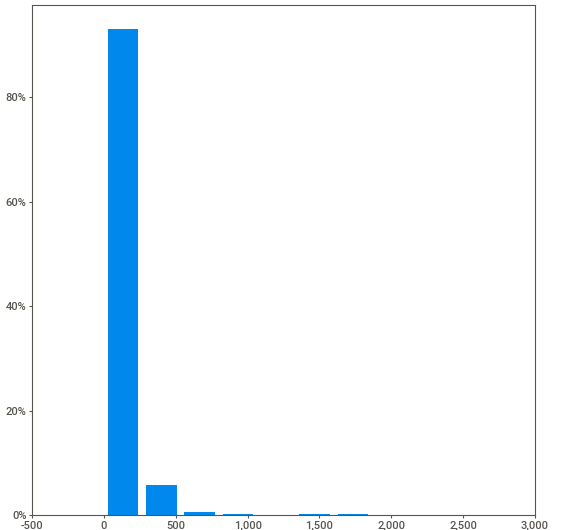
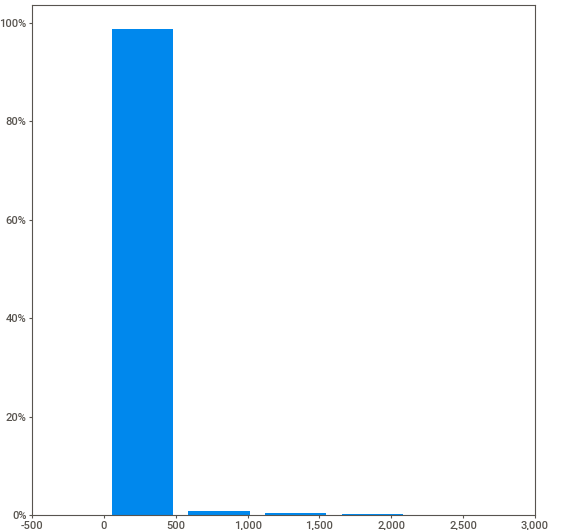
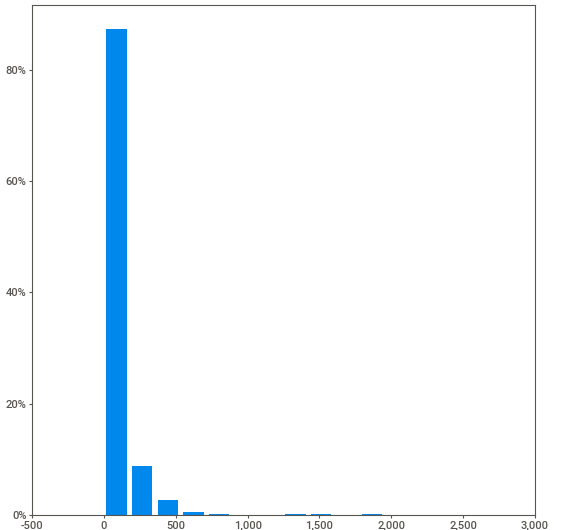
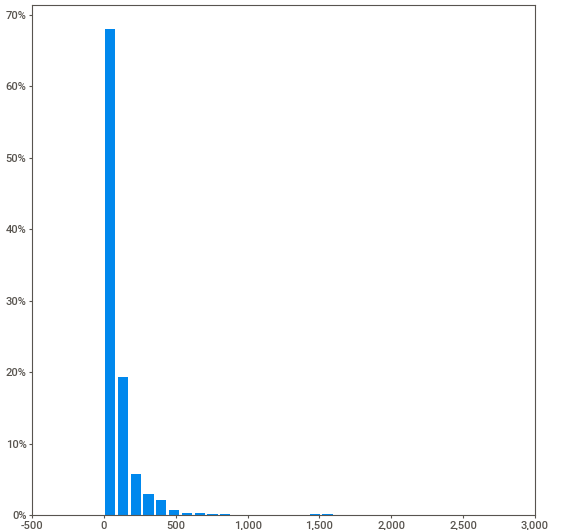
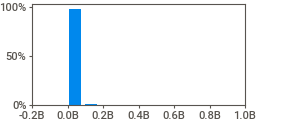
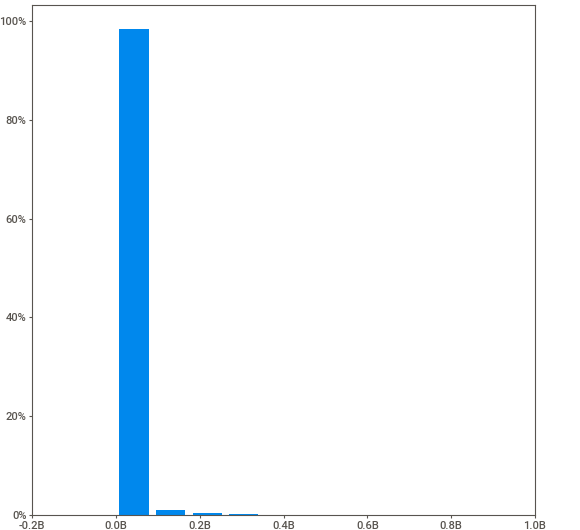
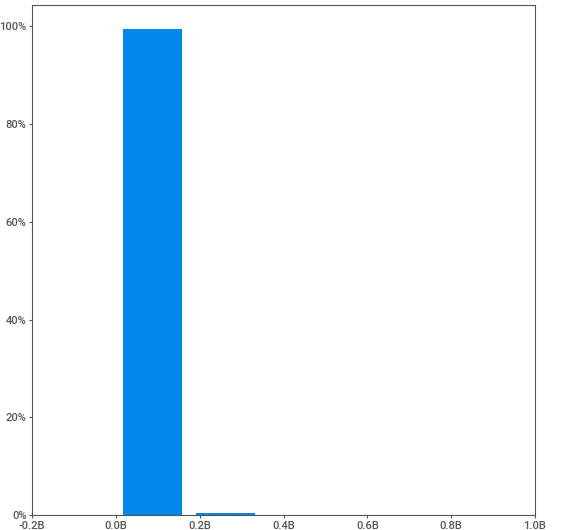
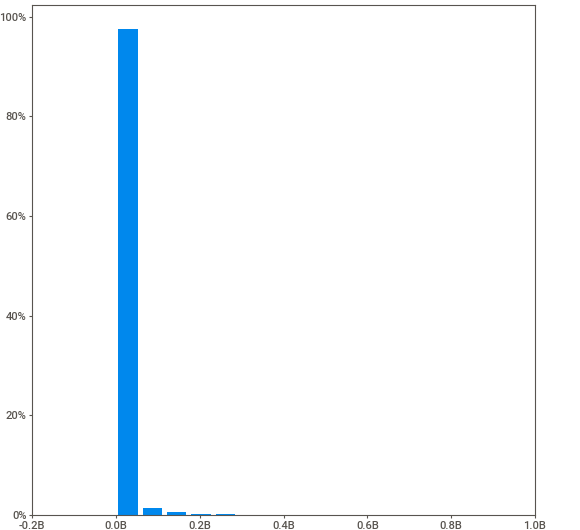
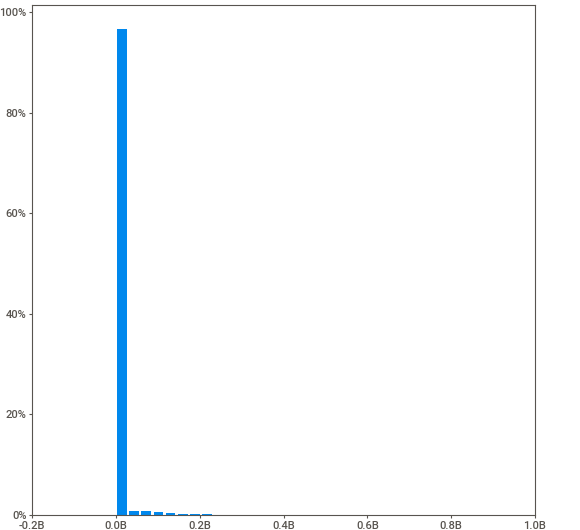
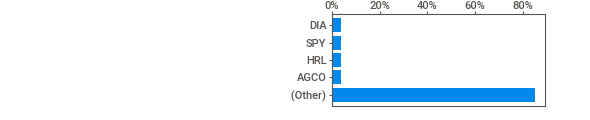
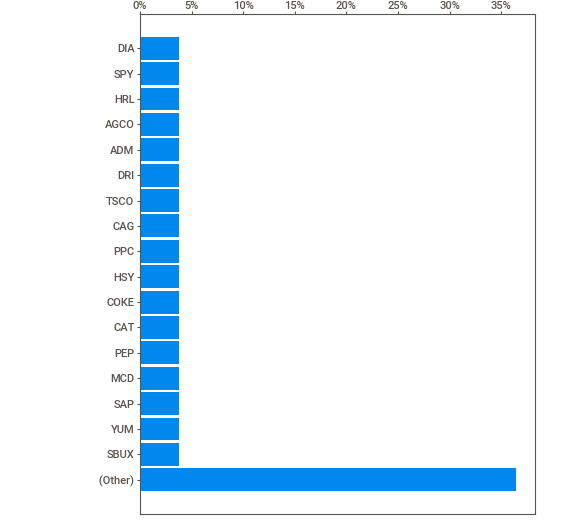
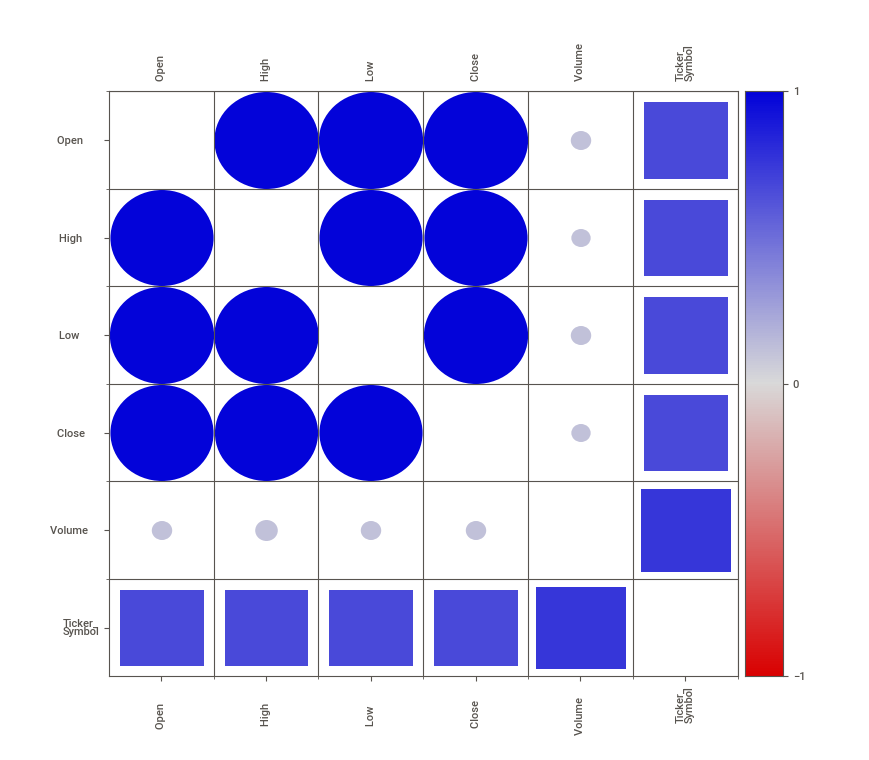
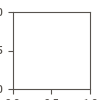

In [14]:
my_report = sv.analyze(df)
my_report.show_notebook()

Plot time series data of coca cola stock

Index(['Date-Time  ', 'Open      ', 'High      ', 'Low       ', 'Close     ',
       'Volume    ', 'Ticker_Symbol'],
      dtype='object')
128051    2024-02-20 
128052    2024-02-16 
128053    2024-02-15 
128054    2024-02-14 
128055    2024-02-13 
             ...     
134160    1999-11-05 
134161    1999-11-04 
134162    1999-11-03 
134163    1999-11-02 
134164    1999-11-01 
Name: Date-Time  , Length: 6114, dtype: object


/home/cdv/Datathon/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cdv/Datathon/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date-Time  ', ylabel='Close     '>

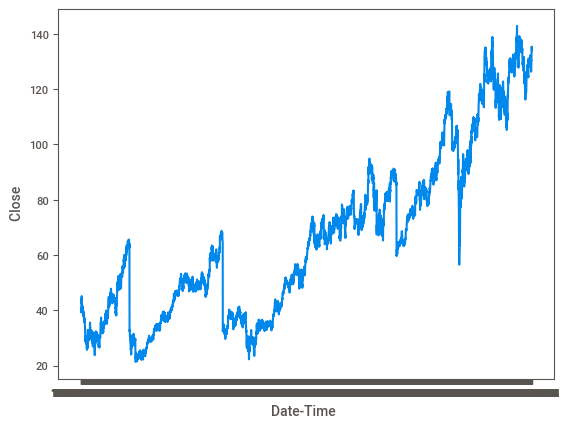

In [31]:
coke_df = df[df['Ticker_Symbol'] == 'YUM']
print(coke_df.columns)
print(coke_df['Date-Time  '])
coke_df = coke_df.iloc[::-1]
sns.lineplot(x="Date-Time  ", y="Close     ", data=coke_df)

Index(['Date-Time  ', 'Open      ', 'High      ', 'Low       ', 'Close     ',
       'Volume    ', 'Ticker_Symbol'],
      dtype='object')
97478     2024-02-23 
97479     2024-02-22 
97480     2024-02-21 
97481     2024-02-20 
97482     2024-02-16 
             ...     
103590    1999-11-05 
103591    1999-11-04 
103592    1999-11-03 
103593    1999-11-02 
103594    1999-11-01 
Name: Date-Time  , Length: 6117, dtype: object


/home/cdv/Datathon/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cdv/Datathon/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date-Time  ', ylabel='Close     '>

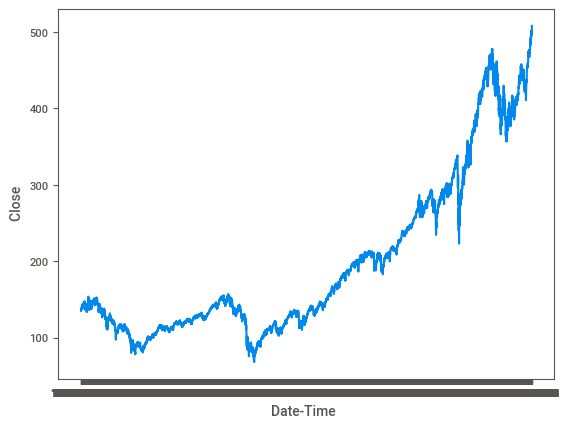

In [32]:
coke_df = df[df['Ticker_Symbol'] == 'SPY']
print(coke_df.columns)
print(coke_df['Date-Time  '])
coke_df = coke_df.iloc[::-1]
sns.lineplot(x="Date-Time  ", y="Close     ", data=coke_df)

## Create metric for growth

In [11]:
df = pd.read_csv('../dataset/filtered_stock.csv')

df.columns = df.columns.str.strip()
df['Date-Time'] = pd.to_datetime(df['Date-Time'])
df['YearMonth'] = df['Date-Time'].dt.to_period('M')


df_sorted = df.sort_values(by=['Ticker_Symbol', 'Date-Time'])

first_open_prices = df_sorted.groupby(['Ticker_Symbol', 'YearMonth'])['Open'].first().reset_index()

first_open_prices['Prev_First_Open'] = first_open_prices.groupby('Ticker_Symbol')['Open'].shift(1)

first_open_prices['Monthly_Growth (%)'] = ((first_open_prices['Open'] - first_open_prices['Prev_First_Open']) / first_open_prices['Prev_First_Open']) * 100

first_open_prices['Cumulative_Growth (%)'] = first_open_prices.groupby('Ticker_Symbol')['Monthly_Growth (%)'].cumsum()

growth = first_open_prices.dropna(subset=['Prev_First_Open'])

growth.head()

,Ticker_Symbol,YearMonth,Open,Prev_First_Open,Monthly_Growth (%),Cumulative_Growth (%)
1,ADM,1999-12,12.260,12.150,0.905350,0.905350
2,ADM,2000-01,12.000,12.260,-2.120718,-1.215368
3,ADM,2000-02,11.750,12.000,-2.083333,-3.298701
4,ADM,2000-03,9.938,11.750,-15.421277,-18.719978
5,ADM,2000-04,10.560,9.938,6.258805,-12.461173


## Plot growth for each symbol

/var/folders/_z/09vrqlq533g4mwf_3hh2dzrc0000gn/T/ipykernel_21535/2228047195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  display_data['YearMonth_str'] = display_data['YearMonth'].astype(str)
/Users/jezza/Desktop/CompSci-Year2/citadel-datathon/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jezza/Desktop/CompSci-Year2/citadel-datathon/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating i

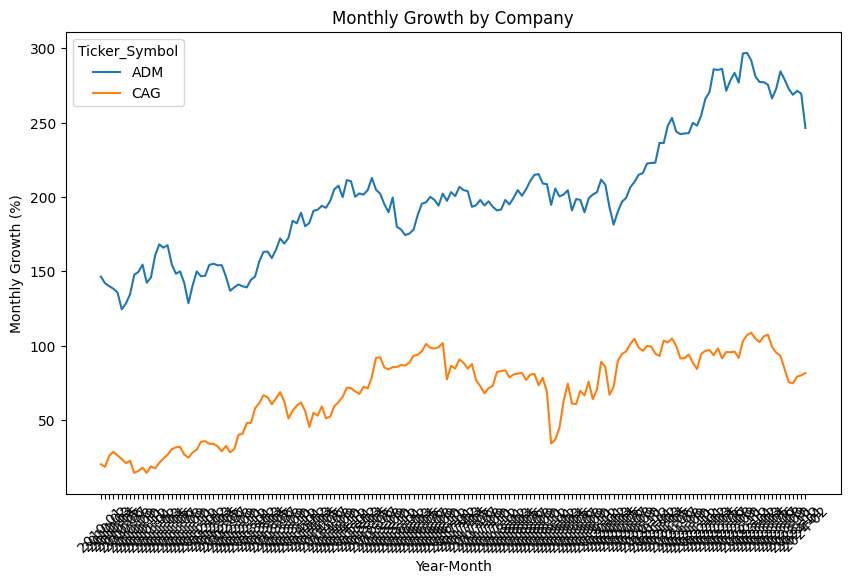

In [14]:
display_data = growth[growth['YearMonth'] >= pd.Period('2010-01')]

display_data['YearMonth_str'] = display_data['YearMonth'].astype(str)

company_subset = display_data['Ticker_Symbol'].unique()[:2] # First 10 companies
plot_data = display_data[display_data['Ticker_Symbol'].isin(company_subset)]


plt.figure(figsize=(10, 6)) # TODO - Note that graph is not well labeled
sns.lineplot(data=plot_data, x='YearMonth_str', y='Cumulative_Growth (%)', hue='Ticker_Symbol')
plt.xticks(rotation=45)
plt.title('Monthly Growth by Company')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Growth (%)')
plt.show()